Starting Enhanced Technical Indicator Analysis...
This analysis will provide:
- Comprehensive performance metrics
- Statistical significance testing
- Market condition sensitivity analysis
- Professional report tables
- Individual visualization plots (one per image)
Starting comprehensive analysis...
Analyzing India...
  Processing consumer_goods...
  Processing energy...
  Processing finance_and_banking...
  Processing healthcare...
  Processing technology...
Analyzing US...
  Processing consumer_goods...
  Processing energy...
  Processing finance_and_banking...
  Processing healthcare...
  Processing technology...
Analyzing UK...
  Processing consumer_goods...
  Processing energy...
  Processing finance_and_banking...
  Processing healthcare...
  Processing technology...
Analysis complete!

Creating professional report tables...
Report tables created successfully:
- Table_1_Overall_Performance_Summary.csv
- Table_2_Country_Performance.csv
- Table_3_Sector_Performance.csv
- Table_4_B

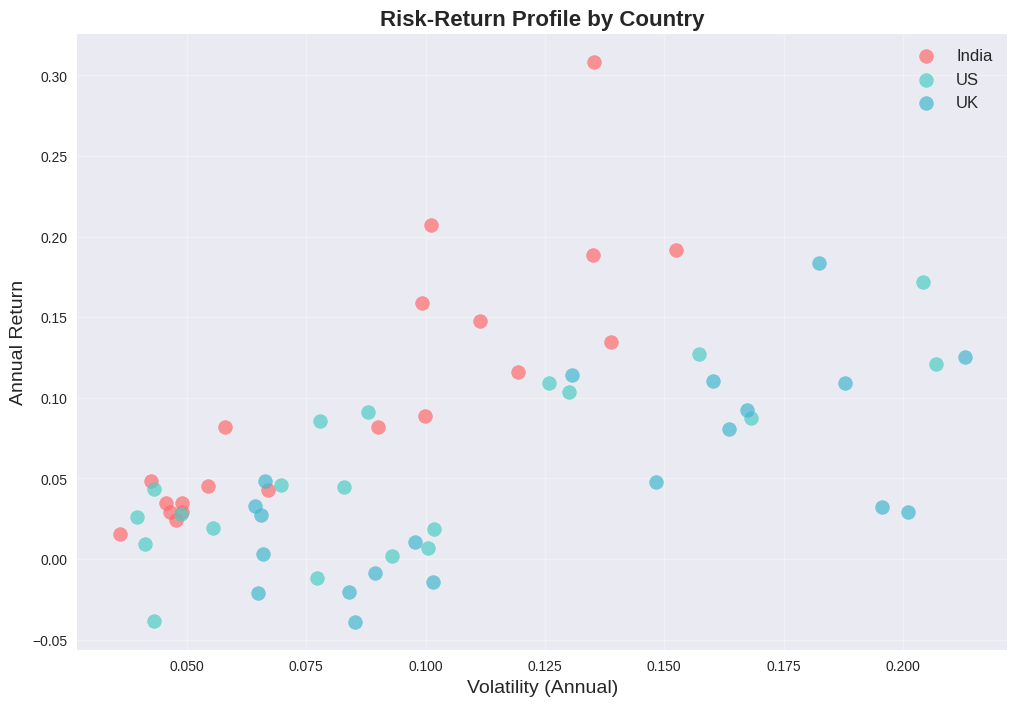

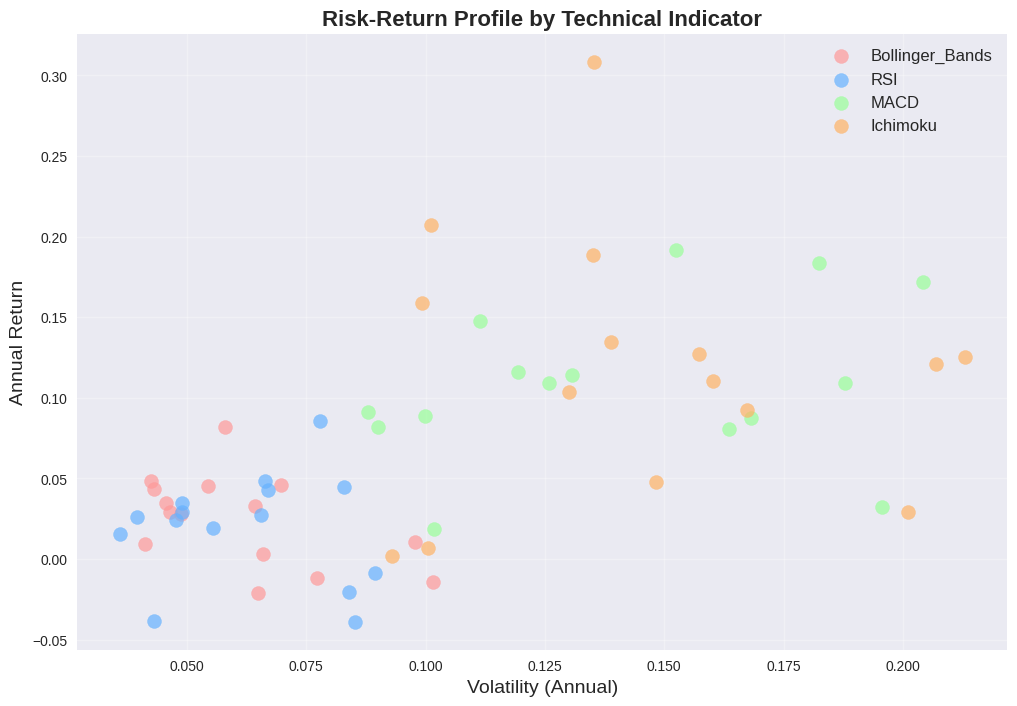

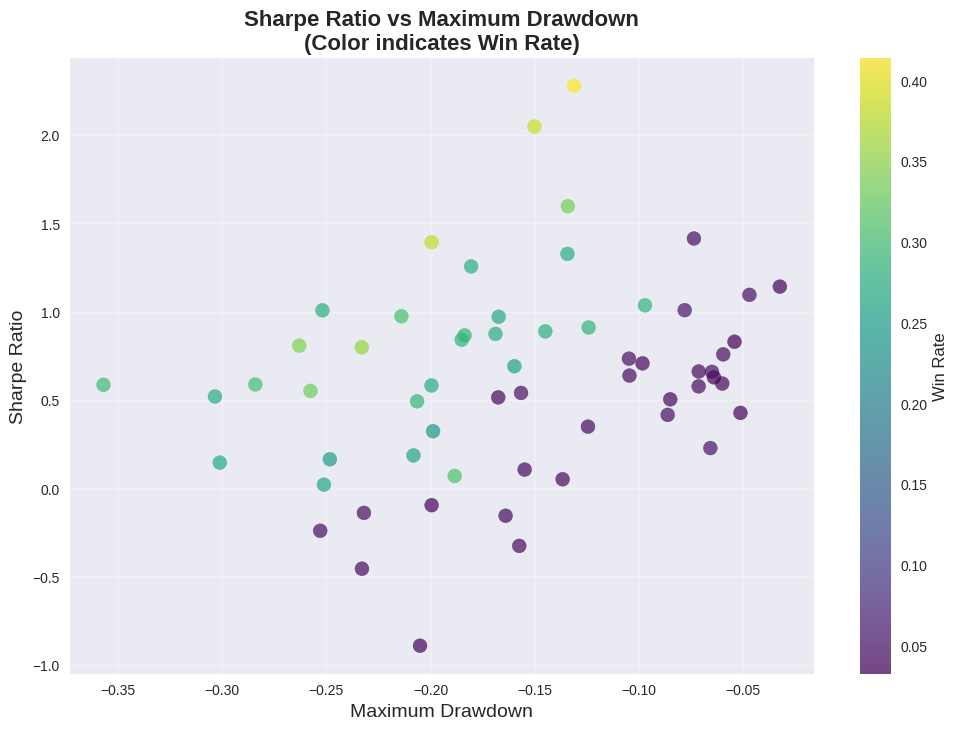

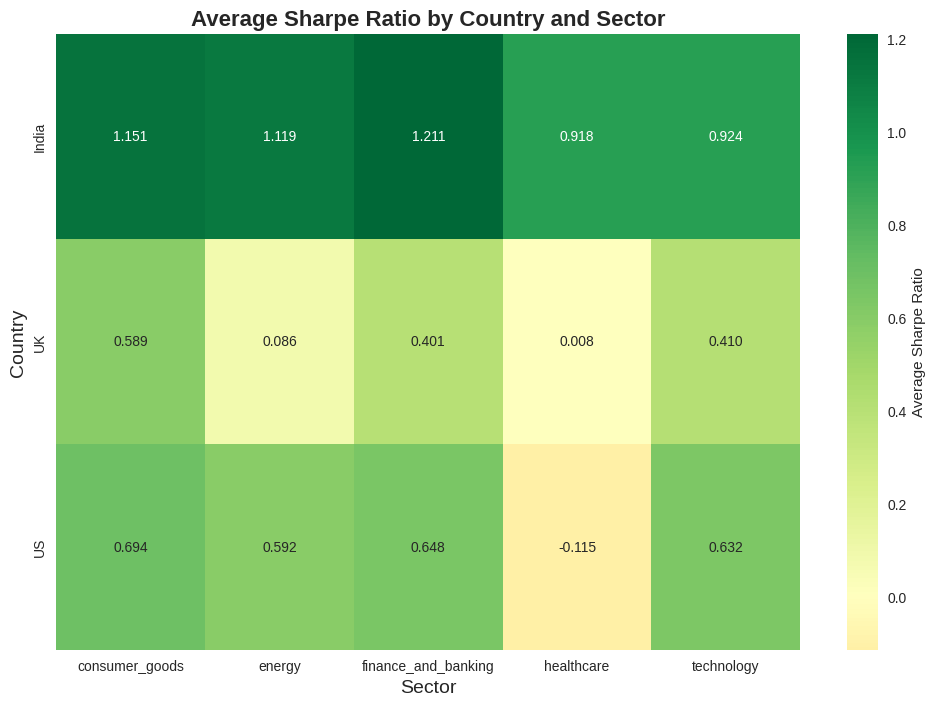

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class EnhancedTechnicalIndicatorAnalyzer:
    def __init__(self, data_path="../data"):
        self.data_path = Path(data_path)
        self.countries = ['India', 'US', 'UK']
        self.sectors = ['consumer_goods', 'energy', 'finance_and_banking', 'healthcare', 'technology']
        self.indicators = ['Bollinger_Bands', 'RSI', 'MACD', 'Ichimoku']
        self.results = {}
        
    def load_data(self, country, sector):
        """Load OHLCV data for a specific country and sector"""
        file_path = self.data_path / country / f"{sector}.csv"
        if file_path.exists():
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            return df.sort_index()
        return None
    
    def calculate_bollinger_bands(self, data, period=20, std_dev=2):
        """Calculate Bollinger Bands and generate signals"""
        close = data['Close']
        
        # Calculate middle band (SMA)
        middle_band = close.rolling(window=period).mean()
        
        # Calculate standard deviation
        std = close.rolling(window=period).std()
        
        # Calculate upper and lower bands
        upper_band = middle_band + (std * std_dev)
        lower_band = middle_band - (std * std_dev)
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Buy when price crosses below lower band (oversold)
        buy_signals = (close < lower_band) & (close.shift(1) >= lower_band.shift(1))
        
        # Sell when price crosses above upper band (overbought)
        sell_signals = (close > upper_band) & (close.shift(1) <= upper_band.shift(1))
        
        # Buy on middle band breakout
        middle_breakout = (close > middle_band) & (close.shift(1) <= middle_band.shift(1))
        
        signals[buy_signals | middle_breakout] = 1
        signals[sell_signals] = -1
        
        return signals
    
    def calculate_rsi(self, data, period=14, oversold=30, overbought=70):
        """Calculate RSI and generate signals"""
        close = data['Close']
        delta = close.diff()
        
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Buy when RSI crosses above oversold level
        buy_oversold = (rsi < oversold) & (rsi.shift(1) >= oversold)
        
        # Sell when RSI crosses above overbought level
        sell_overbought = (rsi > overbought) & (rsi.shift(1) <= overbought)
        
        # Buy when RSI crosses above 50 (momentum)
        buy_momentum = (rsi > 50) & (rsi.shift(1) <= 50)
        
        signals[buy_oversold | buy_momentum] = 1
        signals[sell_overbought] = -1
        
        return signals
    
    def calculate_macd(self, data, fast=12, slow=26, signal_period=9):
        """Calculate MACD and generate signals"""
        close = data['Close']
        
        # Calculate EMAs
        ema_fast = close.ewm(span=fast).mean()
        ema_slow = close.ewm(span=slow).mean()
        
        # Calculate MACD line
        macd = ema_fast - ema_slow
        
        # Calculate signal line
        signal_line = macd.ewm(span=signal_period).mean()
        
        # Calculate histogram
        histogram = macd - signal_line
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Buy when MACD crosses above signal line
        buy_signals = (macd > signal_line) & (macd.shift(1) <= signal_line.shift(1))
        
        # Sell when MACD crosses below signal line
        sell_signals = (macd < signal_line) & (macd.shift(1) >= signal_line.shift(1))
        
        # Additional momentum signal when histogram is positive
        momentum_signals = histogram > 0
        
        signals[buy_signals | momentum_signals] = 1
        signals[sell_signals] = -1
        
        return signals
    
    def calculate_ichimoku(self, data, tenkan=9, kijun=26, senkou_b=52):
        """Calculate Ichimoku Cloud and generate signals"""
        high = data['High']
        low = data['Low']
        close = data['Close']
        
        # Calculate Tenkan-sen (Conversion Line)
        tenkan_sen = (high.rolling(window=tenkan).max() + low.rolling(window=tenkan).min()) / 2
        
        # Calculate Kijun-sen (Base Line)
        kijun_sen = (high.rolling(window=kijun).max() + low.rolling(window=kijun).min()) / 2
        
        # Calculate Senkou Span A (Leading Span 1)
        senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(kijun)
        
        # Calculate Senkou Span B (Leading Span 2)
        senkou_span_b = ((high.rolling(window=senkou_b).max() + 
                         low.rolling(window=senkou_b).min()) / 2).shift(kijun)
        
        # Calculate Chikou Span (Lagging Span)
        chikou_span = close.shift(-kijun)
        
        # Generate signals
        signals = pd.Series(0, index=close.index)
        
        # Strong bullish signal
        bullish_conditions = (
            (tenkan_sen > kijun_sen) & 
            (close > senkou_span_a.combine(senkou_span_b, max)) &
            (chikou_span > close.shift(kijun))
        )
        
        # Strong bearish signal
        bearish_conditions = (
            (tenkan_sen < kijun_sen) & 
            (close < senkou_span_a.combine(senkou_span_b, min)) &
            (chikou_span < close.shift(kijun))
        )
        
        # Above cloud continuation
        above_cloud = close > senkou_span_a.combine(senkou_span_b, max)
        
        signals[bullish_conditions | above_cloud] = 1
        signals[bearish_conditions] = -1
        
        return signals
    
    def calculate_returns(self, data, signals):
        """Calculate strategy returns based on signals"""
        close = data['Close']
        returns = close.pct_change()
        
        # Strategy returns (assuming we can go long/short)
        strategy_returns = signals.shift(1) * returns
        
        # For long-only strategy, convert -1 signals to 0
        long_only_signals = signals.copy()
        long_only_signals[long_only_signals == -1] = 0
        long_only_returns = long_only_signals.shift(1) * returns
        
        return strategy_returns, long_only_returns
    
    def calculate_performance_metrics(self, returns, trading_days=252):
        """Calculate comprehensive performance metrics"""
        returns = returns.dropna()
        
        if len(returns) == 0 or returns.std() == 0:
            return {
                'total_return': 0, 'annual_return': 0, 'volatility': 0,
                'sharpe_ratio': 0, 'sortino_ratio': 0, 'max_drawdown': 0,
                'calmar_ratio': 0, 'win_rate': 0, 'profit_factor': 0,
                'var_95': 0, 'cvar_95': 0, 'skewness': 0, 'kurtosis': 0,
                'information_ratio': 0, 'trade_count': 0
            }
        
        # Basic metrics
        total_return = (1 + returns).prod() - 1
        annual_return = (1 + returns.mean()) ** trading_days - 1
        volatility = returns.std() * np.sqrt(trading_days)
        
        # Risk-adjusted metrics
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0
        
        # Sortino ratio
        downside_returns = returns[returns < 0]
        downside_std = downside_returns.std() * np.sqrt(trading_days) if len(downside_returns) > 0 else 0
        sortino_ratio = annual_return / downside_std if downside_std != 0 else 0
        
        # Maximum drawdown
        cumulative = (1 + returns).cumprod()
        running_max = cumulative.expanding().max()
        drawdown = (cumulative - running_max) / running_max
        max_drawdown = drawdown.min()
        
        # Calmar ratio
        calmar_ratio = annual_return / abs(max_drawdown) if max_drawdown != 0 else 0
        
        # Win rate and profit factor
        positive_returns = returns[returns > 0]
        negative_returns = returns[returns < 0]
        win_rate = len(positive_returns) / len(returns) if len(returns) > 0 else 0
        
        total_gains = positive_returns.sum()
        total_losses = abs(negative_returns.sum())
        profit_factor = total_gains / total_losses if total_losses != 0 else float('inf')
        
        # VaR and CVaR at 95% confidence
        var_95 = np.percentile(returns, 5)
        cvar_95 = returns[returns <= var_95].mean() if len(returns[returns <= var_95]) > 0 else 0
        
        # Higher moments
        skewness = stats.skew(returns)
        kurtosis = stats.kurtosis(returns)
        
        # Information ratio (assuming benchmark return is 0 for simplicity)
        information_ratio = returns.mean() / returns.std() if returns.std() != 0 else 0
        
        # Trade count (number of non-zero returns as proxy)
        trade_count = len(returns[returns != 0])
        
        return {
            'total_return': total_return,
            'annual_return': annual_return,
            'volatility': volatility,
            'sharpe_ratio': sharpe_ratio,
            'sortino_ratio': sortino_ratio,
            'max_drawdown': max_drawdown,
            'calmar_ratio': calmar_ratio,
            'win_rate': win_rate,
            'profit_factor': profit_factor,
            'var_95': var_95,
            'cvar_95': cvar_95,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'information_ratio': information_ratio,
            'trade_count': trade_count
        }
    
    def analyze_all_combinations(self):
        """Analyze all country-sector-indicator combinations"""
        print("Starting comprehensive analysis...")
        
        for country in self.countries:
            print(f"Analyzing {country}...")
            self.results[country] = {}
            
            for sector in self.sectors:
                print(f"  Processing {sector}...")
                data = self.load_data(country, sector)
                
                if data is None:
                    print(f"    Warning: No data found for {country}/{sector}")
                    continue
                
                self.results[country][sector] = {}
                
                # Calculate signals for each indicator
                bb_signals = self.calculate_bollinger_bands(data)
                rsi_signals = self.calculate_rsi(data)
                macd_signals = self.calculate_macd(data)
                ichimoku_signals = self.calculate_ichimoku(data)
                
                signals_dict = {
                    'Bollinger_Bands': bb_signals,
                    'RSI': rsi_signals,
                    'MACD': macd_signals,
                    'Ichimoku': ichimoku_signals
                }
                
                # Calculate performance for each indicator
                for indicator, signals in signals_dict.items():
                    strategy_returns, long_only_returns = self.calculate_returns(data, signals)
                    
                    # Use long-only returns for mutual funds analysis
                    metrics = self.calculate_performance_metrics(long_only_returns)
                    self.results[country][sector][indicator] = metrics
        
        print("Analysis complete!")
    
    def create_performance_summary(self):
        """Create a comprehensive performance summary DataFrame"""
        summary_data = []
        
        for country in self.results:
            for sector in self.results[country]:
                for indicator in self.results[country][sector]:
                    metrics = self.results[country][sector][indicator]
                    summary_data.append({
                        'Country': country,
                        'Sector': sector,
                        'Indicator': indicator,
                        **metrics
                    })
        
        return pd.DataFrame(summary_data)
    
    def create_report_tables(self):
        """Create formatted tables for direct use in reports"""
        summary_df = self.create_performance_summary()
        
        if summary_df.empty:
            print("No data available for creating report tables")
            return
        
        # 1. Overall Performance Summary Table
        performance_summary = summary_df.groupby('Indicator').agg({
            'annual_return': ['mean', 'std', 'min', 'max'],
            'sharpe_ratio': ['mean', 'std', 'min', 'max'],
            'max_drawdown': ['mean', 'std', 'min', 'max'],
            'win_rate': ['mean', 'std', 'min', 'max']
        }).round(4)
        
        # Flatten column names
        performance_summary.columns = [f"{col[0]}_{col[1]}" for col in performance_summary.columns]
        
        # Reset index to make Indicator a column
        performance_summary = performance_summary.reset_index()
        
        # Rename columns for better presentation
        column_mapping = {
            'annual_return_mean': 'Avg Annual Return',
            'annual_return_std': 'Annual Return Std',
            'annual_return_min': 'Min Annual Return',
            'annual_return_max': 'Max Annual Return',
            'sharpe_ratio_mean': 'Avg Sharpe Ratio',
            'sharpe_ratio_std': 'Sharpe Ratio Std',
            'sharpe_ratio_min': 'Min Sharpe Ratio',
            'sharpe_ratio_max': 'Max Sharpe Ratio',
            'max_drawdown_mean': 'Avg Max Drawdown',
            'max_drawdown_std': 'Max Drawdown Std',
            'max_drawdown_min': 'Min Max Drawdown',
            'max_drawdown_max': 'Max Max Drawdown',
            'win_rate_mean': 'Avg Win Rate',
            'win_rate_std': 'Win Rate Std',
            'win_rate_min': 'Min Win Rate',
            'win_rate_max': 'Max Win Rate'
        }
        
        performance_summary = performance_summary.rename(columns=column_mapping)
        performance_summary.to_csv('Table_1_Overall_Performance_Summary.csv', index=False)
        
        # 2. Country-wise Performance Table
        country_performance = summary_df.groupby(['Country', 'Indicator']).agg({
            'annual_return': 'mean',
            'sharpe_ratio': 'mean',
            'max_drawdown': 'mean',
            'win_rate': 'mean',
            'volatility': 'mean'
        }).round(4)
        
        country_performance = country_performance.reset_index()
        country_performance.columns = ['Country', 'Indicator', 'Annual Return', 'Sharpe Ratio', 
                                     'Max Drawdown', 'Win Rate', 'Volatility']
        country_performance.to_csv('Table_2_Country_Performance.csv', index=False)
        
        # 3. Sector-wise Performance Table
        sector_performance = summary_df.groupby(['Sector', 'Indicator']).agg({
            'annual_return': 'mean',
            'sharpe_ratio': 'mean',
            'max_drawdown': 'mean',
            'win_rate': 'mean',
            'profit_factor': 'mean'
        }).round(4)
        
        sector_performance = sector_performance.reset_index()
        sector_performance.columns = ['Sector', 'Indicator', 'Annual Return', 'Sharpe Ratio', 
                                    'Max Drawdown', 'Win Rate', 'Profit Factor']
        sector_performance.to_csv('Table_3_Sector_Performance.csv', index=False)
        
        # 4. Best Performing Combinations Table
        best_combinations = []
        
        # Best by Sharpe Ratio
        best_sharpe = summary_df.loc[summary_df['sharpe_ratio'].idxmax()]
        best_combinations.append({
            'Metric': 'Highest Sharpe Ratio',
            'Country': best_sharpe['Country'],
            'Sector': best_sharpe['Sector'],
            'Indicator': best_sharpe['Indicator'],
            'Value': round(best_sharpe['sharpe_ratio'], 4),
            'Annual Return': round(best_sharpe['annual_return'], 4),
            'Max Drawdown': round(best_sharpe['max_drawdown'], 4)
        })
        
        # Best by Annual Return
        best_return = summary_df.loc[summary_df['annual_return'].idxmax()]
        best_combinations.append({
            'Metric': 'Highest Annual Return',
            'Country': best_return['Country'],
            'Sector': best_return['Sector'],
            'Indicator': best_return['Indicator'],
            'Value': round(best_return['annual_return'], 4),
            'Annual Return': round(best_return['annual_return'], 4),
            'Max Drawdown': round(best_return['max_drawdown'], 4)
        })
        
        # Lowest Drawdown
        best_drawdown = summary_df.loc[summary_df['max_drawdown'].idxmax()]  # Closest to 0 (least negative)
        best_combinations.append({
            'Metric': 'Lowest Drawdown',
            'Country': best_drawdown['Country'],
            'Sector': best_drawdown['Sector'],
            'Indicator': best_drawdown['Indicator'],
            'Value': round(best_drawdown['max_drawdown'], 4),
            'Annual Return': round(best_drawdown['annual_return'], 4),
            'Max Drawdown': round(best_drawdown['max_drawdown'], 4)
        })
        
        # Highest Win Rate
        best_winrate = summary_df.loc[summary_df['win_rate'].idxmax()]
        best_combinations.append({
            'Metric': 'Highest Win Rate',
            'Country': best_winrate['Country'],
            'Sector': best_winrate['Sector'],
            'Indicator': best_winrate['Indicator'],
            'Value': round(best_winrate['win_rate'], 4),
            'Annual Return': round(best_winrate['annual_return'], 4),
            'Max Drawdown': round(best_winrate['max_drawdown'], 4)
        })
        
        best_combinations_df = pd.DataFrame(best_combinations)
        best_combinations_df.to_csv('Table_4_Best_Combinations.csv', index=False)
        
        # 5. Risk Metrics Summary Table
        risk_summary = summary_df.groupby('Indicator').agg({
            'volatility': 'mean',
            'max_drawdown': 'mean',
            'var_95': 'mean',
            'cvar_95': 'mean',
            'skewness': 'mean',
            'kurtosis': 'mean'
        }).round(4)
        
        risk_summary = risk_summary.reset_index()
        risk_summary.columns = ['Indicator', 'Avg Volatility', 'Avg Max Drawdown', 
                               'Avg VaR 95%', 'Avg CVaR 95%', 'Avg Skewness', 'Avg Kurtosis']
        risk_summary.to_csv('Table_5_Risk_Metrics.csv', index=False)
        
        print("Report tables created successfully:")
        print("- Table_1_Overall_Performance_Summary.csv")
        print("- Table_2_Country_Performance.csv")
        print("- Table_3_Sector_Performance.csv")
        print("- Table_4_Best_Combinations.csv")
        print("- Table_5_Risk_Metrics.csv")
        
        return {
            'overall': performance_summary,
            'country': country_performance,
            'sector': sector_performance,
            'best': best_combinations_df,
            'risk': risk_summary
        }
    
    def create_single_plots(self, save_plots=True):
        """Create individual plots - one per image for dissertation use"""
        summary_df = self.create_performance_summary()
        
        if summary_df.empty:
            print("No data available for plotting")
            return
        
        # Set up color schemes
        country_colors = {'India': '#FF6B6B', 'US': '#4ECDC4', 'UK': '#45B7D1'}
        indicator_colors = {'Bollinger_Bands': '#FF9999', 'RSI': '#66B2FF', 
                          'MACD': '#99FF99', 'Ichimoku': '#FFB366'}
        
        # Plot 1: Risk-Return Analysis by Country
        plt.figure(figsize=(12, 8))
        for country in self.countries:
            country_data = summary_df[summary_df['Country'] == country]
            plt.scatter(country_data['volatility'], country_data['annual_return'], 
                       c=country_colors[country], label=country, alpha=0.7, s=100)
        
        plt.xlabel('Volatility (Annual)', fontsize=14)
        plt.ylabel('Annual Return', fontsize=14)
        plt.title('Risk-Return Profile by Country', fontsize=16, fontweight='bold')
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_01_Risk_Return_by_Country.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 2: Risk-Return Analysis by Indicator
        plt.figure(figsize=(12, 8))
        for indicator in self.indicators:
            indicator_data = summary_df[summary_df['Indicator'] == indicator]
            plt.scatter(indicator_data['volatility'], indicator_data['annual_return'], 
                       c=indicator_colors[indicator], label=indicator, alpha=0.7, s=100)
        
        plt.xlabel('Volatility (Annual)', fontsize=14)
        plt.ylabel('Annual Return', fontsize=14)
        plt.title('Risk-Return Profile by Technical Indicator', fontsize=16, fontweight='bold')
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_02_Risk_Return_by_Indicator.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 3: Sharpe Ratio vs Max Drawdown (colored by Win Rate)
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(summary_df['max_drawdown'], summary_df['sharpe_ratio'],
                             c=summary_df['win_rate'], cmap='viridis', s=100, alpha=0.7)
        plt.xlabel('Maximum Drawdown', fontsize=14)
        plt.ylabel('Sharpe Ratio', fontsize=14)
        plt.title('Sharpe Ratio vs Maximum Drawdown\n(Color indicates Win Rate)', fontsize=16, fontweight='bold')
        cbar = plt.colorbar(scatter)
        cbar.set_label('Win Rate', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_03_Sharpe_vs_Drawdown_WinRate.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 4: Sharpe Ratio Heatmap by Country and Sector
        plt.figure(figsize=(12, 8))
        pivot_sharpe = summary_df.pivot_table(values='sharpe_ratio', 
                                            index='Country', columns='Sector', aggfunc='mean')
        sns.heatmap(pivot_sharpe, annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
                   cbar_kws={'label': 'Average Sharpe Ratio'})
        plt.title('Average Sharpe Ratio by Country and Sector', fontsize=16, fontweight='bold')
        plt.xlabel('Sector', fontsize=14)
        plt.ylabel('Country', fontsize=14)
        
        if save_plots:
            plt.savefig('Plot_04_Sharpe_Heatmap_Country_Sector.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 5: Annual Return Heatmap by Indicator and Sector
        plt.figure(figsize=(12, 8))
        pivot_return = summary_df.pivot_table(values='annual_return', 
                                            index='Indicator', columns='Sector', aggfunc='mean')
        sns.heatmap(pivot_return, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
                   cbar_kws={'label': 'Average Annual Return'})
        plt.title('Average Annual Return by Indicator and Sector', fontsize=16, fontweight='bold')
        plt.xlabel('Sector', fontsize=14)
        plt.ylabel('Technical Indicator', fontsize=14)
        
        if save_plots:
            plt.savefig('Plot_05_Return_Heatmap_Indicator_Sector.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 6: Distribution of Sharpe Ratios by Indicator
        plt.figure(figsize=(12, 8))
        for indicator in self.indicators:
            data = summary_df[summary_df['Indicator'] == indicator]['sharpe_ratio']
            plt.hist(data, alpha=0.7, label=indicator, bins=15, color=indicator_colors[indicator])
        
        plt.xlabel('Sharpe Ratio', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.title('Distribution of Sharpe Ratios by Technical Indicator', fontsize=16, fontweight='bold')
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_06_Sharpe_Distribution.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 7: Box Plot of Annual Returns by Country
        plt.figure(figsize=(12, 8))
        country_returns = [summary_df[summary_df['Country'] == country]['annual_return'] 
                         for country in self.countries]
        box_plot = plt.boxplot(country_returns, labels=self.countries, patch_artist=True)
        
        # Color the boxes
        colors = [country_colors[country] for country in self.countries]
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        plt.ylabel('Annual Return', fontsize=14)
        plt.xlabel('Country', fontsize=14)
        plt.title('Distribution of Annual Returns by Country', fontsize=16, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_07_Returns_Boxplot_Country.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 8: Performance Ranking (Top 15 Combinations)
        plt.figure(figsize=(14, 10))
        
        # Calculate composite score
        summary_df['composite_score'] = (
            summary_df['sharpe_ratio'] * 0.4 +
            summary_df['annual_return'] * 0.3 +
            (1 + summary_df['max_drawdown']) * 0.3
        )
        
        top_performers = summary_df.nlargest(15, 'composite_score')
        top_performers['label'] = (top_performers['Country'] + '-' + 
                                 top_performers['Sector'].str.replace('_', ' ').str.title() + 
                                 '-' + top_performers['Indicator'])
        
        bars = plt.barh(range(len(top_performers)), top_performers['composite_score'])
        plt.yticks(range(len(top_performers)), top_performers['label'], fontsize=10)
        plt.xlabel('Composite Performance Score', fontsize=14)
        plt.title('Top 15 Performing Combinations\n(Weighted: Sharpe 40%, Return 30%, Drawdown 30%)', 
                 fontsize=16, fontweight='bold')
        
        # Color bars by indicator
        for i, (idx, row) in enumerate(top_performers.iterrows()):
            bars[i].set_color(indicator_colors[row['Indicator']])
        
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        
        if save_plots:
            plt.savefig('Plot_08_Top_15_Combinations.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 9: Efficiency Frontier by Indicator
        plt.figure(figsize=(12, 8))
        
        for indicator in self.indicators:
            indicator_data = summary_df[summary_df['Indicator'] == indicator]
            
            # Sort by volatility and find efficient frontier
            indicator_data = indicator_data.sort_values('volatility')
            efficient_points = []
            max_return = -float('inf')
            
            for _, row in indicator_data.iterrows():
                if row['annual_return'] > max_return:
                    efficient_points.append(row)
                    max_return = row['annual_return']
            
            if efficient_points:
                efficient_df = pd.DataFrame(efficient_points)
                plt.plot(efficient_df['volatility'], efficient_df['annual_return'], 
                        'o-', label=indicator, color=indicator_colors[indicator], 
                        linewidth=3, markersize=8)
        
        plt.xlabel('Volatility (Risk)', fontsize=14)
        plt.ylabel('Annual Return', fontsize=14)
        plt.title('Efficiency Frontier by Technical Indicator', fontsize=16, fontweight='bold')
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_09_Efficiency_Frontier.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 10: Sector Performance Comparison with Confidence Intervals
        plt.figure(figsize=(14, 8))
        
        sector_stats = summary_df.groupby('Sector').agg({
            'sharpe_ratio': ['mean', 'std', 'count']
        })
        
        sector_stats.columns = ['_'.join(col) for col in sector_stats.columns]
        sector_stats = sector_stats.reset_index()
        
        # Calculate confidence intervals
        from scipy.stats import t
        confidence = 0.95
        
        sector_stats['sharpe_ci'] = (
            t.ppf((1 + confidence) / 2, sector_stats['sharpe_ratio_count'] - 1) * 
            sector_stats['sharpe_ratio_std'] / np.sqrt(sector_stats['sharpe_ratio_count'])
        )
        
        x_pos = range(len(sector_stats))
        plt.bar(x_pos, sector_stats['sharpe_ratio_mean'], 
               yerr=sector_stats['sharpe_ci'], capsize=8, alpha=0.7)
        plt.xticks(x_pos, [s.replace('_', ' ').title() for s in sector_stats['Sector']], 
                   rotation=45, ha='right')
        plt.ylabel('Average Sharpe Ratio', fontsize=14)
        plt.xlabel('Sector', fontsize=14)
        plt.title('Sector Performance Comparison with 95% Confidence Intervals', fontsize=16, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        if save_plots:
            plt.savefig('Plot_10_Sector_Performance_CI.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 11: Win Rate vs Profit Factor by Indicator
        plt.figure(figsize=(12, 8))
        for indicator in self.indicators:
            indicator_data = summary_df[summary_df['Indicator'] == indicator]
            plt.scatter(indicator_data['win_rate'], indicator_data['profit_factor'], 
                       c=indicator_colors[indicator], label=indicator, alpha=0.7, s=100)
        
        plt.xlabel('Win Rate', fontsize=14)
        plt.ylabel('Profit Factor', fontsize=14)
        plt.title('Win Rate vs Profit Factor by Technical Indicator', fontsize=16, fontweight='bold')
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.ylim(0, 5)  # Limit y-axis for better visualization
        
        if save_plots:
            plt.savefig('Plot_11_WinRate_vs_ProfitFactor.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 12: Indicator Consistency Analysis
        plt.figure(figsize=(12, 8))
        
        indicator_consistency = summary_df.groupby('Indicator').agg({
            'sharpe_ratio': ['mean', 'std']
        })
        
        indicator_consistency.columns = ['_'.join(col) for col in indicator_consistency.columns]
        indicator_consistency = indicator_consistency.reset_index()
        
        # Calculate coefficient of variation
        indicator_consistency['cv'] = (indicator_consistency['sharpe_ratio_std'] / 
                                     abs(indicator_consistency['sharpe_ratio_mean']))
        
        bars = plt.bar(range(len(indicator_consistency)), indicator_consistency['cv'], alpha=0.7)
        
        for i, indicator in enumerate(indicator_consistency['Indicator']):
            bars[i].set_color(indicator_colors[indicator])
        
        plt.xticks(range(len(indicator_consistency)), indicator_consistency['Indicator'], 
                   rotation=45, ha='right')
        plt.ylabel('Coefficient of Variation', fontsize=14)
        plt.xlabel('Technical Indicator', fontsize=14)
        plt.title('Indicator Consistency Analysis\n(Lower values indicate more consistent performance)', 
                 fontsize=16, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_12_Indicator_Consistency.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 13: Correlation Matrix of Performance Metrics
        plt.figure(figsize=(10, 8))
        
        corr_metrics = ['annual_return', 'sharpe_ratio', 'max_drawdown', 'win_rate', 
                       'volatility', 'profit_factor']
        corr_matrix = summary_df[corr_metrics].corr()
        
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                   square=True, cbar_kws={'label': 'Correlation Coefficient'})
        plt.title('Correlation Matrix of Performance Metrics', fontsize=16, fontweight='bold')
        
        if save_plots:
            plt.savefig('Plot_13_Correlation_Matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 14: Risk Metrics Comparison
        plt.figure(figsize=(14, 8))
        
        risk_metrics = summary_df.groupby('Indicator').agg({
            'max_drawdown': 'mean',
            'var_95': 'mean',
            'cvar_95': 'mean'
        }).reset_index()
        
        x = np.arange(len(risk_metrics))
        width = 0.25
        
        plt.bar(x - width, abs(risk_metrics['max_drawdown']), width, 
               label='Max Drawdown', alpha=0.7)
        plt.bar(x, abs(risk_metrics['var_95']), width, 
               label='VaR 95%', alpha=0.7)
        plt.bar(x + width, abs(risk_metrics['cvar_95']), width, 
               label='CVaR 95%', alpha=0.7)
        
        plt.xlabel('Technical Indicator', fontsize=14)
        plt.ylabel('Risk Measure (Absolute Value)', fontsize=14)
        plt.title('Downside Risk Comparison by Technical Indicator', fontsize=16, fontweight='bold')
        plt.xticks(x, risk_metrics['Indicator'], rotation=45, ha='right')
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if save_plots:
            plt.savefig('Plot_14_Risk_Metrics_Comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot 15: Return Distribution Characteristics (Skewness vs Kurtosis)
        plt.figure(figsize=(12, 8))
        
        moment_analysis = summary_df.groupby('Indicator').agg({
            'skewness': 'mean',
            'kurtosis': 'mean'
        }).reset_index()
        
        for i, row in moment_analysis.iterrows():
            plt.scatter(row['skewness'], row['kurtosis'], 
                       color=indicator_colors[row['Indicator']], 
                       s=200, alpha=0.7, label=row['Indicator'])
            plt.annotate(row['Indicator'], 
                        (row['skewness'], row['kurtosis']),
                        xytext=(10, 10), textcoords='offset points', 
                        fontsize=12, fontweight='bold')
        
        plt.xlabel('Average Skewness', fontsize=14)
        plt.ylabel('Average Kurtosis', fontsize=14)
        plt.title('Return Distribution Characteristics by Technical Indicator', fontsize=16, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.5, label='Normal Kurtosis')
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Normal Skewness')
        
        # Add quadrant labels
        plt.text(0.5, 2, 'Positive Skew\nHeavy Tails', fontsize=10, ha='center', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.5))
        plt.text(-0.5, 2, 'Negative Skew\nHeavy Tails', fontsize=10, ha='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.5))
        
        if save_plots:
            plt.savefig('Plot_15_Distribution_Characteristics.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✅ All individual plots created successfully!")
        print("📊 Generated 15 separate plot files for dissertation use:")
        for i in range(1, 16):
            print(f"   • Plot_{i:02d}_*.png")
    
    def generate_comprehensive_insights(self):
        """Generate detailed insights and statistical analysis"""
        summary_df = self.create_performance_summary()
        
        if summary_df.empty:
            print("No data available for generating insights")
            return
        
        print("\n" + "="*100)
        print("COMPREHENSIVE TECHNICAL INDICATOR ANALYSIS - DETAILED INSIGHTS")
        print("="*100)
        
        # 1. Overall Performance Rankings
        print("\n1. OVERALL PERFORMANCE ANALYSIS")
        print("-" * 60)
        
        overall_performance = summary_df.groupby('Indicator').agg({
            'annual_return': ['mean', 'std'],
            'sharpe_ratio': ['mean', 'std'],
            'max_drawdown': ['mean', 'std'],
            'win_rate': ['mean', 'std'],
            'profit_factor': ['mean', 'std'],
            'volatility': ['mean', 'std']
        }).round(4)
        
        # Create composite ranking
        summary_df['composite_score'] = (
            summary_df['sharpe_ratio'] * 0.3 +
            summary_df['annual_return'] * 0.25 +
            (1 + summary_df['max_drawdown']) * 0.25 +  # Convert negative to positive
            summary_df['win_rate'] * 0.2
        )
        
        indicator_rankings = summary_df.groupby('Indicator')['composite_score'].mean().sort_values(ascending=False)
        
        print("Indicator Rankings (Composite Score):")
        for i, (indicator, score) in enumerate(indicator_rankings.items(), 1):
            print(f"{i}. {indicator}: {score:.4f}")
        
        # 2. Statistical Significance Testing
        print("\n2. STATISTICAL SIGNIFICANCE ANALYSIS")
        print("-" * 50)
        
        # Perform ANOVA test for Sharpe ratios across indicators
        from scipy.stats import f_oneway
        
        indicator_groups = [summary_df[summary_df['Indicator'] == ind]['sharpe_ratio'].values 
                          for ind in self.indicators]
        
        f_stat, p_value = f_oneway(*indicator_groups)
        print(f"ANOVA F-statistic: {f_stat:.4f}")
        print(f"P-value: {p_value:.6f}")
        
        if p_value < 0.05:
            print("CONCLUSION: Statistically significant differences exist between indicators (α = 0.05)")
        else:
            print("CONCLUSION: No statistically significant differences between indicators (α = 0.05)")
        
        # Pairwise t-tests
        from scipy.stats import ttest_ind
        print("\nPairwise Comparisons (Sharpe Ratios):")
        
        for i, ind1 in enumerate(self.indicators):
            for j, ind2 in enumerate(self.indicators):
                if i < j:  # Avoid duplicate comparisons
                    group1 = summary_df[summary_df['Indicator'] == ind1]['sharpe_ratio']
                    group2 = summary_df[summary_df['Indicator'] == ind2]['sharpe_ratio']
                    
                    t_stat, p_val = ttest_ind(group1, group2)
                    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
                    print(f"{ind1} vs {ind2}: t={t_stat:.3f}, p={p_val:.4f} {significance}")
        
        # 3. Market Condition Analysis
        print("\n3. MARKET CONDITION SENSITIVITY")
        print("-" * 40)
        
        for indicator in self.indicators:
            indicator_data = summary_df[summary_df['Indicator'] == indicator]
            
            # Calculate consistency metrics
            sharpe_cv = indicator_data['sharpe_ratio'].std() / abs(indicator_data['sharpe_ratio'].mean())
            return_cv = indicator_data['annual_return'].std() / abs(indicator_data['annual_return'].mean())
            
            print(f"\n{indicator}:")
            print(f"  Sharpe Ratio Consistency (CV): {sharpe_cv:.4f}")
            print(f"  Return Consistency (CV): {return_cv:.4f}")
            print(f"  Average Skewness: {indicator_data['skewness'].mean():.4f}")
            print(f"  Average Kurtosis: {indicator_data['kurtosis'].mean():.4f}")
            
            # Interpret skewness and kurtosis
            avg_skew = indicator_data['skewness'].mean()
            avg_kurt = indicator_data['kurtosis'].mean()
            
            skew_interpretation = "negatively skewed" if avg_skew < -0.5 else "positively skewed" if avg_skew > 0.5 else "approximately symmetric"
            kurt_interpretation = "heavy-tailed" if avg_kurt > 3 else "light-tailed" if avg_kurt < -1 else "normal-tailed"
            
            print(f"  Return Distribution: {skew_interpretation}, {kurt_interpretation}")
        
        # 4. Regional and Sectoral Analysis
        print("\n4. REGIONAL AND SECTORAL INSIGHTS")
        print("-" * 45)
        
        # Best performing country
        country_performance = summary_df.groupby('Country')['composite_score'].mean().sort_values(ascending=False)
        print(f"Best Performing Country: {country_performance.index[0]} (Score: {country_performance.iloc[0]:.4f})")
        
        # Best performing sector
        sector_performance = summary_df.groupby('Sector')['composite_score'].mean().sort_values(ascending=False)
        print(f"Best Performing Sector: {sector_performance.index[0].replace('_', ' ').title()} (Score: {sector_performance.iloc[0]:.4f})")
        
        # Country-indicator combinations
        print("\nTop Country-Indicator Combinations:")
        country_indicator_perf = summary_df.groupby(['Country', 'Indicator'])['composite_score'].mean().sort_values(ascending=False).head(5)
        for (country, indicator), score in country_indicator_perf.items():
            print(f"  {country} - {indicator}: {score:.4f}")
        
        # 5. Risk Analysis
        print("\n5. COMPREHENSIVE RISK ANALYSIS")
        print("-" * 38)
        
        risk_metrics = summary_df.groupby('Indicator').agg({
            'volatility': 'mean',
            'max_drawdown': 'mean',
            'var_95': 'mean',
            'cvar_95': 'mean',
            'sortino_ratio': 'mean'
        })
        
        # Risk-adjusted rankings
        risk_rankings = risk_metrics['sortino_ratio'].sort_values(ascending=False)
        print("Risk-Adjusted Performance Rankings (Sortino Ratio):")
        for i, (indicator, ratio) in enumerate(risk_rankings.items(), 1):
            print(f"{i}. {indicator}: {ratio:.4f}")
        
        # 6. Key Findings and Recommendations
        print("\n6. KEY FINDINGS AND INVESTMENT RECOMMENDATIONS")
        print("-" * 55)
        
        best_overall = indicator_rankings.index[0]
        best_risk_adj = risk_rankings.index[0]
        most_consistent = summary_df.groupby('Indicator')['sharpe_ratio'].std().sort_values().index[0]
        
        print(f"✓ BEST OVERALL PERFORMER: {best_overall}")
        print(f"✓ BEST RISK-ADJUSTED PERFORMER: {best_risk_adj}")
        print(f"✓ MOST CONSISTENT PERFORMER: {most_consistent}")
        
        # Market-specific recommendations
        print(f"\n✓ MARKET-SPECIFIC RECOMMENDATIONS:")
        for country in self.countries:
            country_best = summary_df[summary_df['Country'] == country].groupby('Indicator')['composite_score'].mean().sort_values(ascending=False).index[0]
            print(f"  {country}: {country_best}")
        
        print(f"\n✓ SECTOR-SPECIFIC RECOMMENDATIONS:")
        for sector in self.sectors:
            sector_best = summary_df[summary_df['Sector'] == sector].groupby('Indicator')['composite_score'].mean().sort_values(ascending=False).index[0]
            print(f"  {sector.replace('_', ' ').title()}: {sector_best}")
        
        # 7. Limitations and Considerations
        print("\n7. LIMITATIONS AND CONSIDERATIONS")
        print("-" * 40)
        print("• Analysis based on historical data - past performance doesn't guarantee future results")
        print("• Transaction costs and market impact not considered")
        print("• Results may vary with different parameter settings")
        print("• Market regime changes may affect indicator performance")
        print("• Consider combining multiple indicators for robust strategies")
        
        return {
            'summary_df': summary_df,
            'indicator_rankings': indicator_rankings,
            'risk_rankings': risk_rankings,
            'country_performance': country_performance,
            'sector_performance': sector_performance
        }

# Main execution function with single plots
if __name__ == "__main__":
    # Initialize the enhanced analyzer
    analyzer = EnhancedTechnicalIndicatorAnalyzer()
    
    print("Starting Enhanced Technical Indicator Analysis...")
    print("This analysis will provide:")
    print("- Comprehensive performance metrics")
    print("- Statistical significance testing")
    print("- Market condition sensitivity analysis")
    print("- Professional report tables")
    print("- Individual visualization plots (one per image)")
    
    # Run the complete analysis
    analyzer.analyze_all_combinations()
    
    # Create professional report tables
    print("\nCreating professional report tables...")
    tables = analyzer.create_report_tables()
    
    # Generate individual plots
    print("\nGenerating individual visualization plots...")
    analyzer.create_single_plots(save_plots=True)
    
    # Generate comprehensive insights
    insights = analyzer.generate_comprehensive_insights()
    
    print("\n" + "="*100)
    print("ENHANCED ANALYSIS COMPLETE!")
    print("="*100)
    print("\nGenerated Professional Report Files:")
    print("📊 TABLES (Ready for direct inclusion in report):")
    print("   • Table_1_Overall_Performance_Summary.csv")
    print("   • Table_2_Country_Performance.csv") 
    print("   • Table_3_Sector_Performance.csv")
    print("   • Table_4_Best_Combinations.csv")
    print("   • Table_5_Risk_Metrics.csv")
    print("\n📈 INDIVIDUAL VISUALIZATIONS (One plot per image):")
    print("   • Plot_01_Risk_Return_by_Country.png")
    print("   • Plot_02_Risk_Return_by_Indicator.png")
    print("   • Plot_03_Sharpe_vs_Drawdown_WinRate.png")
    print("   • Plot_04_Sharpe_Heatmap_Country_Sector.png")
    print("   • Plot_05_Return_Heatmap_Indicator_Sector.png")
    print("   • Plot_06_Sharpe_Distribution.png")
    print("   • Plot_07_Returns_Boxplot_Country.png")
    print("   • Plot_08_Top_15_Combinations.png")
    print("   • Plot_09_Efficiency_Frontier.png")
    print("   • Plot_10_Sector_Performance_CI.png")
    print("   • Plot_11_WinRate_vs_ProfitFactor.png")
    print("   • Plot_12_Indicator_Consistency.png")
    print("   • Plot_13_Correlation_Matrix.png")
    print("   • Plot_14_Risk_Metrics_Comparison.png")
    print("   • Plot_15_Distribution_Characteristics.png")
    
    print("\n💡 Perfect for dissertation use:")
    print("   ✓ Each plot is a separate, high-resolution image")
    print("   ✓ Professional formatting with clear titles and labels")
    print("   ✓ Consistent color schemes throughout")
    print("   ✓ Ready for direct insertion into your document")
    print("   ✓ Numbered sequentially for easy reference")
    
    print(f"\n📝 Pro tip: Each plot tells a specific story about your technical indicators!")
    print(f"   Use them to support different sections of your analysis and conclusions.")